#Business_Case_Study_Netflix_Data_Exploration_and_Visualisation

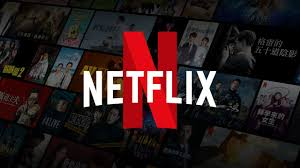

# **About Netflix:**
Netflix is an American subscription video-on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages.
Launched on January 16, 2007, nearly a decade after Netflix, Inc. began its DVD-by-mail service, Netflix is the most-subscribed video-on-demand streaming media service, with 238.39 million paid memberships in more than 190 countries. By 2022, original productions accounted for half of its library in the United States and the namesake company had ventured into other categories, such as video game publishing via its eponymous service.
company headquartered in Los Gatos, California. Netflix was founded in 1997 by Reed
Hastings and Marc Randolph in Scotts Valley, California. The company’s primary business is its subscript on-based streaming service, which offers online streaming of a library of ﬁlms and television series, including those produced in-house.


# **Business Problem:**

Problem Statement:

Analyze the data and generate insights that could help Netlix in deciding which type of
shows/movies to produce and how they can grow the business in diﬀerent countries.

Dataset:

● Show ID : The ID of the show

● Type: Identifier - A Movie or TV Show

● Title: Title of the Movie / Tv Show

● Director: Director of the Movie

● Cast: Actors involved in the movie/show

● Country: Country where the movie/show was produced

● Date_added: Date it was added on Netflix

● Release_year: Actual Release year of the movie/show

● Rating: TV Rating of the movie/show

● Duration: Total Duration - in minutes or number of seasons

● Listed_in: Genre

● Description: The summary description

#What does ‘good’ like?


# **Import Libraries**

In [ ]:
# Importing the libraries we need:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading The Dataset**

In [ ]:
# Using Pandas Library, we’ll load the CSV ﬁle. Named it with netlix_df for the dataset.

netflix_df=pd.read_csv('netflix_titles.csv')

#Comments on the Range of Attributes:
In our dataset, we have a diverse range of attributes, each providing different types of information about the movies and TV shows. Below, we describe the key attributes present in our dataset:

Title: This attribute represents the title or name of each movie or TV show. It serves as a unique identifier for each entry and is crucial for reference.

Type: This categorical attribute indicates whether the entry is a "Movie" or "TV Show." It helps us distinguish between different types of content.

Director: This categorical attribute contains the names of the directors responsible for the production of movies or TV shows. It allows us to analyze directorial patterns and identify top directors.

Cast: Similar to the director attribute, "Cast" is a categorical attribute that lists the names of actors and actresses involved in the production. It helps us understand the popularity and appearances of actors.

Release Year: This numerical attribute represents the year when the movie or TV show was released. It enables us to analyze temporal trends and patterns over time.

Country: This categorical attribute specifies the country or countries associated with the production of each entry. It allows us to explore geographic trends and preferences.

Date Added: This attribute records the date when the content was added to the Netflix platform. It helps us understand when movies or TV shows became available for streaming.

Rating: This categorical attribute indicates the content rating assigned to each entry, such as "TV-MA," "PG-13," etc. It helps viewers make informed choices based on content appropriateness.

Duration: This attribute specifies the duration or runtime of each movie or TV show in terms of minutes or seasons/episodes.

Listed In: This categorical attribute categorizes entries into genres, themes, or content types. It assists in content recommendation and categorization.

The range of attributes in our dataset provides a rich source of information, allowing us to perform various analyses, such as exploring trends in release years, identifying popular directors and actors, and understanding the distribution of content across countries and genres.

# Basic Analysis

In [ ]:
# Calculate the counts of each type
type_counts = netflix_df['type'].value_counts(normalize=True)*100
type_counts

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

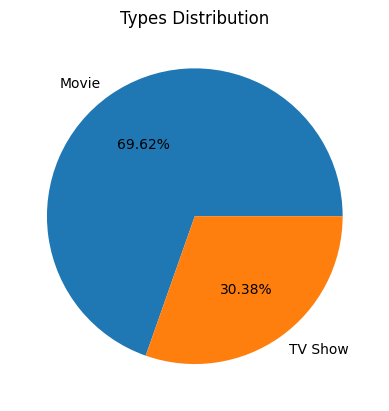

In [ ]:
# Create a pie chart
plt.pie(type_counts, labels=type_counts.index, autopct="%.2f%%")
plt.title('Types Distribution')

# Show the pie chart
plt.show()

In [ ]:
# Gives the overall information of all the columns
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_df.shape

(8807, 12)

In [ ]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Statistical Summary

In [ ]:

# This function provides summary statistics (count, mean, std, min, 25%, 50%, 75%, max)
# for numerical columns in the DataFrame, allowing us to understand the central tendency,
# spread, and distribution of the data.
descriptive_stats = netflix_df.describe()

descriptive_stats

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# This command provides information about categorical data, including count, unique categories,
# the most frequent category, and its frequency, for each categorical column in the DataFrame.

# The .T attribute transposes the output for better readability.

categorical_stats = netflix_df.describe(include='object').T

categorical_stats

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Data Cleaning

Handling null values
a. For categorical variables with null values, update those rows as
unknown_column_name.
Example : Replace missing value with Unknown Actor for missing value in
Actors column.
b. Replace with 0 for continuous variables having null values.

In [ ]:
# Replace NaN values in the 'cast' column with 'Unknown_Actor'
netflix_df['cast'].fillna('Unknown_Actor', inplace=True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown_Actor,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Replace NaN values in the 'director' column with 'Unknown_Director'
netflix_df['director'].fillna('Unknown_Director', inplace=True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Actor,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Replace NaN values in the 'country' column with 'Unknown_Country'
netflix_df['country'].fillna('Unknown_Country', inplace=True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Actor,Unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Remove leading spaces from the 'date_added' column and replace null values with a default value
default_value = 'No Date'  # Replace null values with this value
netflix_df['date_added'] = netflix_df['date_added'].str.strip().fillna(default_value)

# Convert the 'date_added' column to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Actor,Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Replace NaN values in the 'rating' column with a default value
default_value = 'Not Rated'  # Replace NaN values with this value
netflix_df['rating'] = netflix_df['rating'].fillna(default_value)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Actor,Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Replace NaN values in the 'duration' column with a default value
default_value = 'Not Available'  # Replace NaN values with this value
netflix_df['duration'] = netflix_df['duration'].fillna(default_value)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Actor,Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Unnest the columns
a. Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

In [ ]:
# Step 1: Create a DataFrame 'df_new' from the 'cast' column of DataFrame 'df'
constraint = netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()  # Split the 'cast' column by ', ' and convert to a list
df_new = pd.DataFrame(constraint, index=netflix_df['title'])  # Create a DataFrame with the split values, using 'title' as the index

# Step 2: Stack the DataFrame to transform it from wide to long format
df_new = df_new.stack()  # Stack the DataFrame, turning columns into a multi-index

# Step 3: Convert the stacked DataFrame to a regular DataFrame and reset the index
df_new = pd.DataFrame(df_new)  # Convert the stacked DataFrame to a regular DataFrame
df_new.reset_index(inplace=True)  # Reset the index to numeric values

# Step 4: Select and rename columns to have 'title' and 'cast' columns
df_new = df_new[['title', 0]]  # Select only the 'title' and the stacked 'cast' column
df_new.columns = ['title', 'cast']  # Rename the columns to 'title' and 'cast'

# Display the final DataFrame 'df_new'
df_new.head()

,title,cast
0,Dick Johnson Is Dead,Unknown_Actor
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
# Step 1: Create a DataFrame 'df_new_2' from the 'director' column of DataFrame 'df'
constraint_2 = netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()  # Split the 'director' column by ', ' and convert to a list
df_new_2 = pd.DataFrame(constraint_2, index=netflix_df['title'])  # Create a DataFrame with the split values, using 'title' as the index

# Step 2: Stack the DataFrame to transform it from wide to long format
df_new_2 = df_new_2.stack()  # Stack the DataFrame, turning columns into a multi-index

# Step 3: Convert the stacked DataFrame to a regular DataFrame and reset the index
df_new_2 = pd.DataFrame(df_new_2)  # Convert the stacked DataFrame to a regular DataFrame
df_new_2.reset_index(inplace=True)  # Reset the index to numeric values

# Step 4: Select and rename columns to have 'title' and 'director' columns
df_new_2 = df_new_2[['title', 0]]  # Select only the 'title' and the stacked 'director' column
df_new_2.columns = ['title', 'director']  # Rename the columns to 'title' and 'director'

# Display the final DataFrame 'df_new_2'
df_new_2.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown_Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown_Director
4,Kota Factory,Unknown_Director


In [ ]:
# Step 1: Create a DataFrame 'df_new_3' from the 'country' column of DataFrame 'df'
constraint_3 = netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()  # Split the 'country' column by ', ' and convert to a list
df_new_3 = pd.DataFrame(constraint_3, index=netflix_df['title'])  # Create a DataFrame with the split values, using 'title' as the index

# Step 2: Stack the DataFrame to transform it from wide to long format
df_new_3 = df_new_3.stack()  # Stack the DataFrame, turning columns into a multi-index

# Step 3: Convert the stacked DataFrame to a regular DataFrame and reset the index
df_new_3 = pd.DataFrame(df_new_3)  # Convert the stacked DataFrame to a regular DataFrame
df_new_3.reset_index(inplace=True)  # Reset the index to numeric values

# Step 4: Select and rename columns to have 'title' and 'country' columns
df_new_3 = df_new_3[['title', 0]]  # Select only the 'title' and the stacked 'country' column
df_new_3.columns = ['title', 'country']  # Rename the columns to 'title' and 'country'

# Display the final DataFrame 'df_new_3'
df_new_3.head()


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown_Country
3,Jailbirds New Orleans,Unknown_Country
4,Kota Factory,India


In [ ]:
# Step 1: Create a DataFrame 'df_new_4' from the 'listed_in' column of DataFrame 'df'
constraint_4 = netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()  # Split the 'listed_in' column by ', ' and convert to a list
df_new_4 = pd.DataFrame(constraint_4, index=netflix_df['title'])  # Create a DataFrame with the split values, using 'title' as the index

# Step 2: Stack the DataFrame to transform it from wide to long format
df_new_4 = df_new_4.stack()  # Stack the DataFrame, turning columns into a multi-index

# Step 3: Convert the stacked DataFrame to a regular DataFrame and reset the index
df_new_4 = pd.DataFrame(df_new_4)  # Convert the stacked DataFrame to a regular DataFrame
df_new_4.reset_index(inplace=True)  # Reset the index to numeric values

# Step 4: Select and rename columns to have 'title' and 'listed_in' columns
df_new_4 = df_new_4[['title', 0]]  # Select only the 'title' and the stacked 'listed_in' column
df_new_4.columns = ['title', 'listed_in']  # Rename the columns to 'title' and 'listed_in'

# Display the final DataFrame 'df_new_4'
df_new_4.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


# Merge nested columns

In [ ]:
# Step 1: Merge df_new_4 with df_new_3 based on the 'title' column
merge_df_3_4 = df_new_3.merge(df_new_4, on='title')

# Step 2: Merge df_new_2 with the result of step 1 based on the 'title' column
merge_df_2_3_4 = df_new_2.merge(merge_df_3_4, on='title')

# Step 3: Merge df_new with the result of step 2 based on the 'title' column
merge1 = df_new.merge(merge_df_2_3_4, on='title')

# Step 4: Merge the original DataFrame df with the result of step 3 based on the 'title' column
data = netflix_df.merge(merge1, on='title')

# Display the final merged DataFrame 'data'
data.head()


,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,cast_y,director_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown_Actor,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown_Director,South Africa,International TV Shows


# Dropping the duplicate columns

Approach 1

In [ ]:
# Drop one or more columns by specifying their names in a list
data.drop(columns=['director_x','cast_x','country_x','listed_in_x'], inplace=True)
data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast_y,director_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown_Actor,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown_Director,South Africa,International TV Shows


# Rename the columns

In [ ]:
rename_column = {
    'cast_y': 'cast',
    'director_y': 'director',
    'country_y': 'country',
    'listed_in_y': 'listed_in'
}

# Use the rename() method to rename multiple columns
data.rename(columns=rename_column, inplace=True)

In [ ]:
data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown_Actor,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown_Director,South Africa,International TV Shows


In [ ]:
data['release_year'] = data['release_year'].astype(str)
data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown_Actor,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown_Director,South Africa,International TV Shows


In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])
data.head(2)

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown_Actor,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_Director,South Africa,International TV Shows


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   date_added    201833 non-null  datetime64[ns]
 4   release_year  201991 non-null  object        
 5   rating        201991 non-null  object        
 6   duration      201991 non-null  object        
 7   description   201991 non-null  object        
 8   cast          201991 non-null  object        
 9   director      201991 non-null  object        
 10  country       201991 non-null  object        
 11  listed_in     201991 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 20.0+ MB


# 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

a. For Non-graphical Analysis:

involves calculating the summary statistics, without using pictorial or
graphical representations. There are 3 main functions that Pandas Library provides us, and I
will be discussing about them. Those functions are:
1. info(),        
2. isna().sum() or isnull().sum()                   
3. describe()


# **Check the first 5 data.**

## Checking the data using .head()

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Actor,Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Actor,Unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown_Director,Unknown_Actor,Unknown_Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


The dataset contains over 8807 titles, 12 descriptions. After a quick view of the data frames, it looks
like a typical movie/TVshows data frame without ratings. We can also see that there are NaN values
in some columns.

# 1. **info()**

## Data types of all the **attributes**

info() mainly indicates the number of features, non-null count, and data type of each
features. Additionally, it also shows the number of features in present in each data type(s).
This helps us to determine how many numerical and categorical features we have.

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# **2.isna().sum() or isnull().sum()**

In [ ]:
netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

# **3.Read The Description Of The Data**

In [ ]:
# without Transpose and include obj

netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# with Transpose and include obj.

netflix_df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,8807,4529,Unknown_Director,2634
cast,8807,7693,Unknown_Actor,825
country,8807,749,United States,2818
rating,8807,18,TV-MA,3207
duration,8807,221,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


Insights: I wantes to find the values of each category for the given
column so as we can see described the by some points so that we can easily check.

# **2. Comparison of tv shows vs. movies.**

## a. Find the number of movies produced in each country and pick the top 10 countries.

## b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [ ]:
# For Director & Cast we can replace it with "No Data" as we cannot add mode since that will not be correct value

netflix_df['director'].fillna('No Data',inplace=True)
netflix_df['cast'].fillna('No Data',inplace=True)

In [ ]:
# For Country column we can assign mode value to fill missing values

netflix_df['country'].fillna(netflix_df['country'].mode()[0],inplace=True)

In [ ]:
# For filling missing values for rating column with mode value
# first we have to find mode of Movies & TV Shows separately

mrating = netflix_df.loc[netflix_df['type']=='Movie']['rating'].mode()[0]
trating = netflix_df.loc[netflix_df['type']=='TV Show']['rating'].mode()[0]

netflix_df['rating'] = netflix_df.apply(lambda row : mrating if (row.type =='Movie' and pd.isna(row.rating))
else trating if (row.type =='TV Show' and pd.isna(row.rating))
else row.rating,axis=1)

In [ ]:
# For filling missing values for duration column with mode value
# first we will find mode of Movies & TV Shows separately

mduration = netflix_df.loc[netflix_df['type']=='Movie']['duration'].mode()[0]
tduration = netflix_df.loc[netflix_df['type']=='TV Show']['duration'].mode()[0]

netflix_df['duration'] = netflix_df.apply(lambda row : mduration if (row.type =='Movie' and pd.isna(row.duration))
else tduration if (row.type =='TV Show' and pd.isna(row.duration))
else row.duration,axis=1)

In [ ]:
# Dropping remaining rows with missing values (for date_added column )

netflix_df.dropna(inplace=True)

In [ ]:
netflix_df.shape

(8797, 12)

In [ ]:
# Converting date_added column to datetime format

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
(netflix_df['type'].value_counts(normalize = True)*100).round(2)

Movie      69.69
TV Show    30.31
Name: type, dtype: float64

In [ ]:
#Now we extract year & month values from date_added to analyze data in detail

netflix_df['da_year'] = netflix_df['date_added'].dt.year
netflix_df['da_month'] = netflix_df['date_added'].dt.month
netflix_df['da_dayofwk'] = netflix_df['date_added'].dt.day_name()
netflix_df['da_wkofyear'] = netflix_df['date_added'].dt.isocalendar().week


In [ ]:
#  To Analyze data at more granular level we will split & explode data of cast, country,listed_in & director column


netflix_df['cast'] = netflix_df['cast'].apply(lambda x : x.split(','))
df_cast = netflix_df[['show_id','cast']].explode('cast')


netflix_df['country'] = netflix_df['country'].apply(lambda x : x.split(','))
df_country = netflix_df[['show_id','country']].explode('country')


netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x : x.split(','))
df_listed_in = netflix_df[['show_id','listed_in']].explode('listed_in')


netflix_df['director'] = netflix_df['director'].apply(lambda x : x.split(','))
df_director = netflix_df[['show_id','director']].explode('director')

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  da_year       8797 non-null   int64         
 13  da_month      8797 non-null   int64         
 14  da_dayofwk    8797 non-null   object        
 15  da_wkofyear   8797 non-null   UInt32  

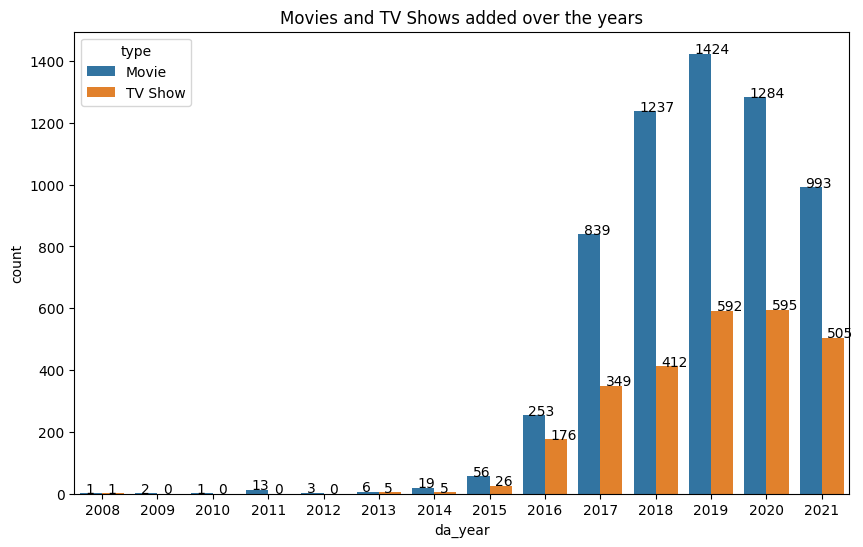

In [ ]:
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(x='da_year', data=netflix_df,hue='type')
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))
plt.title('Movies and TV Shows added over the years')
plt.show()

Insights : This shows that after 2015 ,there is huge growth in number of movies & TV shows added to Netflix.
It also shows that more movies are added than TV shows over the years.
we can also see that after 2020 there is dip in number due to impact of Lockdown (COVID-19).

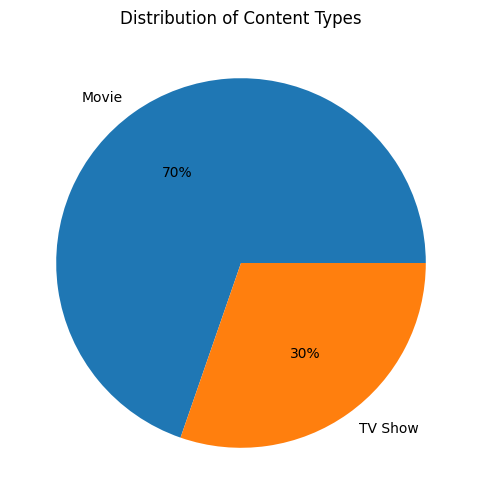

In [ ]:
# Check the distribution of content type

fig = plt.figure(figsize=(6,6))
X=netflix_df.groupby(['type'])['type'].count()
x = [X[0],X[1]]
y = [X.keys()[0],X.keys()[1]]
plt.pie(x, labels=y, autopct='%.0f%%')

plt.title('Distribution of Content Types')
plt.show()

Insights : This shows that 70% of the content on the Netflix is Movie & remaining 30% are TV Shows

# **3. What is the best time to launch a TV show?**

### a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies.

### b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies.

In [ ]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,da_year,da_month,da_dayofwk,da_wkofyear
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Actor],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021,9,Saturday,38
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021,9,Friday,38
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",[Unknown_Country],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,2021,9,Friday,38


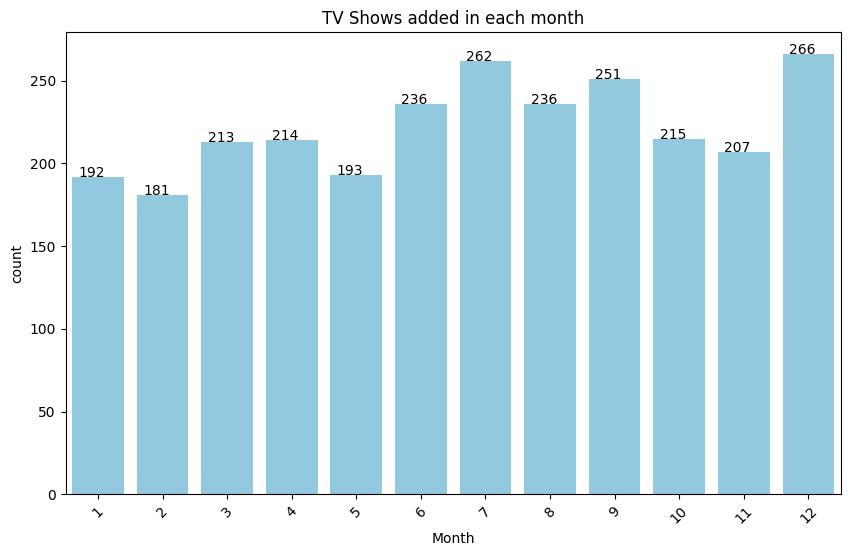

In [ ]:
# Check the best time to launch a TV show

fig = plt.figure(figsize=(10,6))
ax=sns.countplot(x='da_month', data=netflix_df[netflix_df['type']=='TV Show'],color='skyblue')
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))

plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.title('TV Shows added in each month')
plt.show()

Insights : This shows that July & December are the best months to launch TV Shows

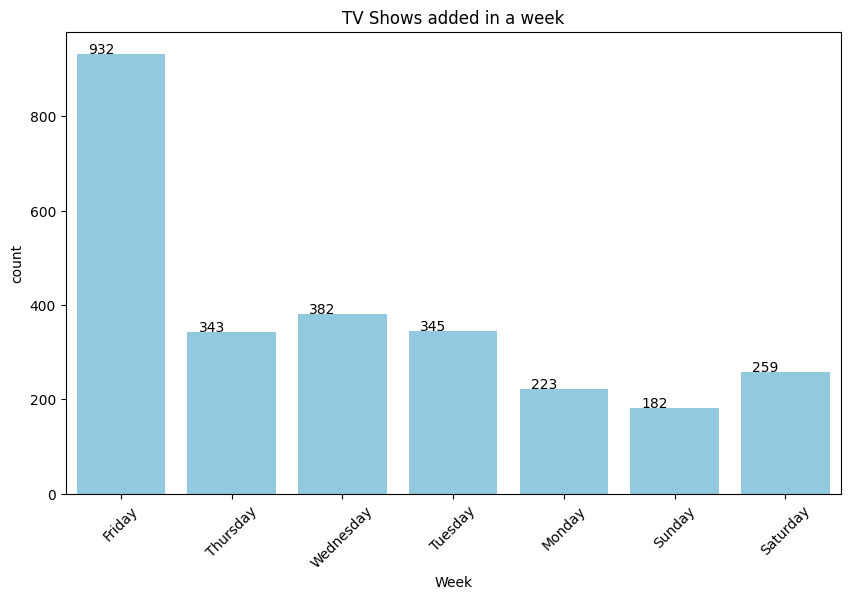

In [ ]:
# Check the best time to launch a TV show

fig = plt.figure(figsize=(10,6))
ax=sns.countplot(x='da_dayofwk', data=netflix_df[netflix_df['type']=='TV Show'],color='skyblue')
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))

plt.xlabel('Week')
plt.xticks(rotation = 45)
plt.title('TV Shows added in a week')
plt.show()


Insights : This shows that July & December are the best months to launch TV Shows

# **4. Analysis of actors/directors of different types of shows/movies.**

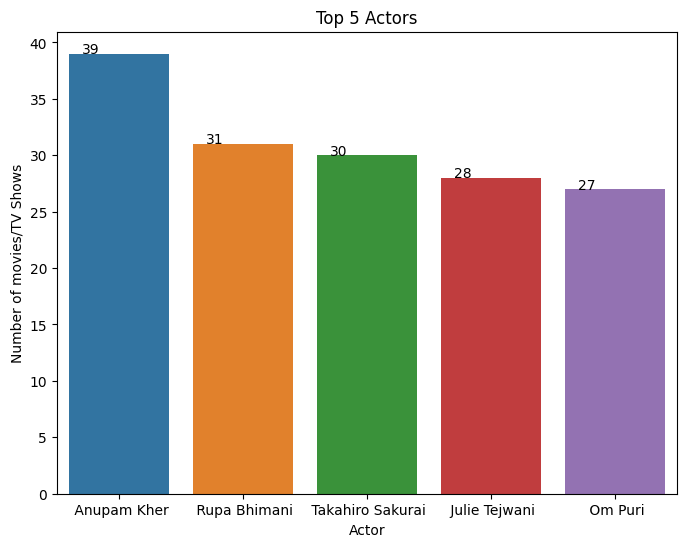

In [ ]:
# Finding top 5 actors by movie/TV show count

top5_actors = df_cast['cast'].value_counts()[1:].head(5)

fig = plt.figure(figsize=(8,6))
ax=sns.barplot(x=top5_actors.index,y=top5_actors.values)
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))

plt.xlabel('Actor')
plt.ylabel('Number of movies/TV Shows')
plt.title('Top 5 Actors')
plt.show()

Insights: want to group by each actor and find the count of unique.

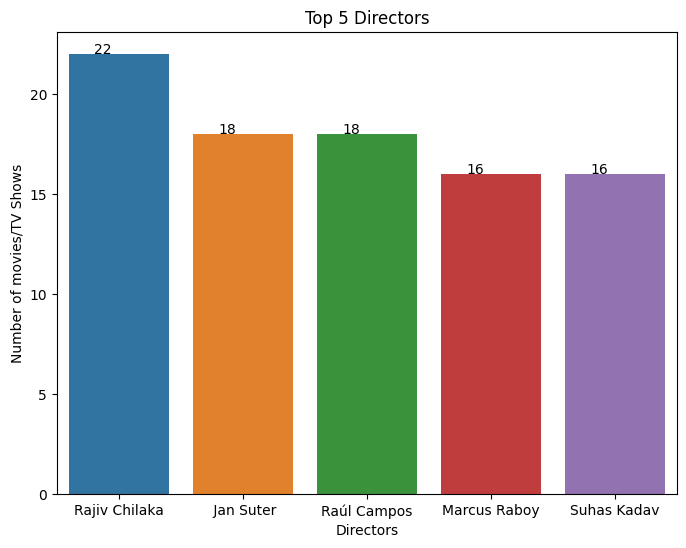

In [ ]:
# Finding top 5 directors by movie/TV show count

top5_directors = df_director['director'].value_counts()[1:].head(5)

fig = plt.figure(figsize=(8,6))
ax=sns.barplot(x=top5_directors.index,y=top5_directors.values)
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))

plt.xlabel('Directors')
plt.ylabel('Number of movies/TV Shows')
plt.title('Top 5 Directors')
plt.show()

Insights: want to group by each director and find the count of unique

# **5. Which genre movies are more popular or produced more**

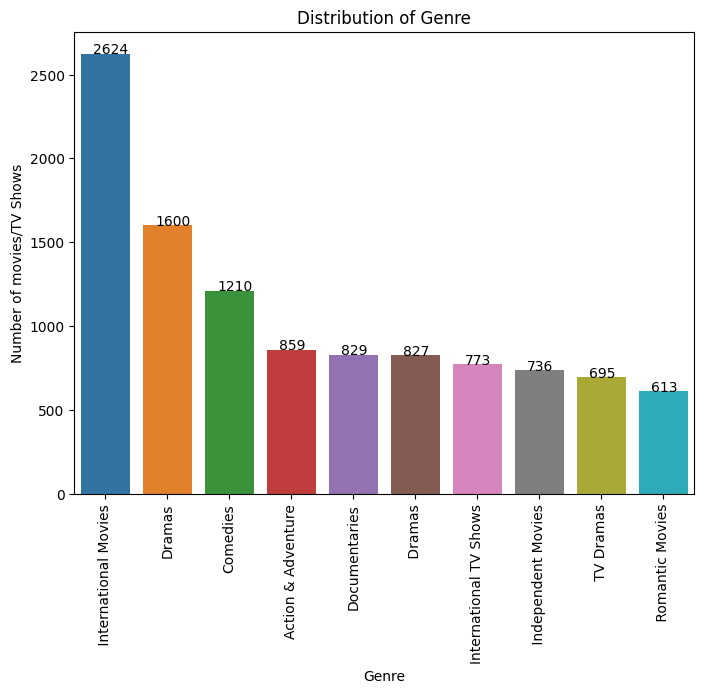

In [ ]:
# Finding top 10 genre

genre = df_listed_in['listed_in'].value_counts().head(10)

fig = plt.figure(figsize=(8,6))
ax=sns.barplot(x=genre.index,y=genre.values)
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))

plt.xlabel('Genre')
plt.ylabel('Number of movies/TV Shows')
plt.xticks(rotation = 90)
plt.title('Distribution of Genre')
plt.show()

Insights : This shows that International Movies are most loved by Netflix viewers followed by Dramas

## **6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

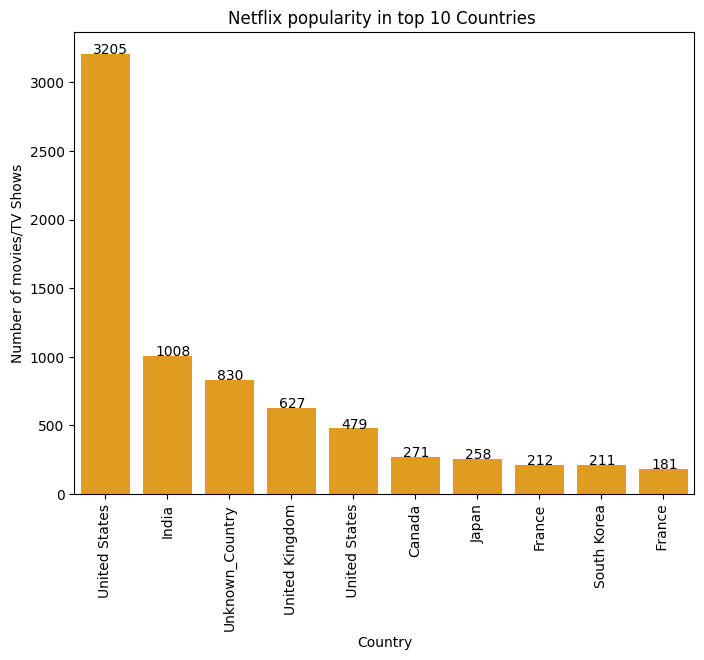

In [ ]:
# Top 10 countries where Netflix is in demand

top10_Countries = df_country['country'].value_counts().head(10)

fig = plt.figure(figsize=(8,6))
ax=sns.barplot(x=top10_Countries.index,y=top10_Countries.values,color='orange')
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))

plt.xlabel('Country')
plt.ylabel('Number of movies/TV Shows')
plt.xticks(rotation = 90)
plt.title('Netflix popularity in top 10 Countries ')
plt.show()

Insights: Netflix is most popular in United States than any other contries

<ipython-input-61-273a153fc93b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_filtered['duration_n'] = netflix_df_filtered['duration'].str.split(' ').str[0].astype('int')


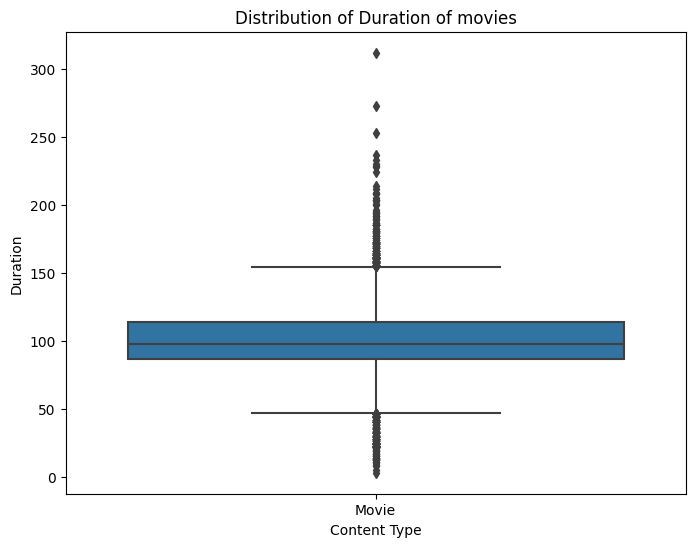

In [ ]:
# # Duration of Movies on Netflix

# Filter out rows with unexpected duration values ('Not') before converting to integers
netflix_df_filtered = netflix_df[netflix_df['duration'].str.split(' ').str[0].str.isnumeric()]

# Convert the duration to integers
netflix_df_filtered['duration_n'] = netflix_df_filtered['duration'].str.split(' ').str[0].astype('int')

# Plotting
fig = plt.figure(figsize=(8,6))
ax = sns.boxplot(data=netflix_df_filtered[netflix_df_filtered['type'] == 'Movie'], x='type', y='duration_n')

plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration of movies')
plt.show()


Insight : Most of the movies fall in reasonable duration range except few which are more than 150 min (2.5 hrs)

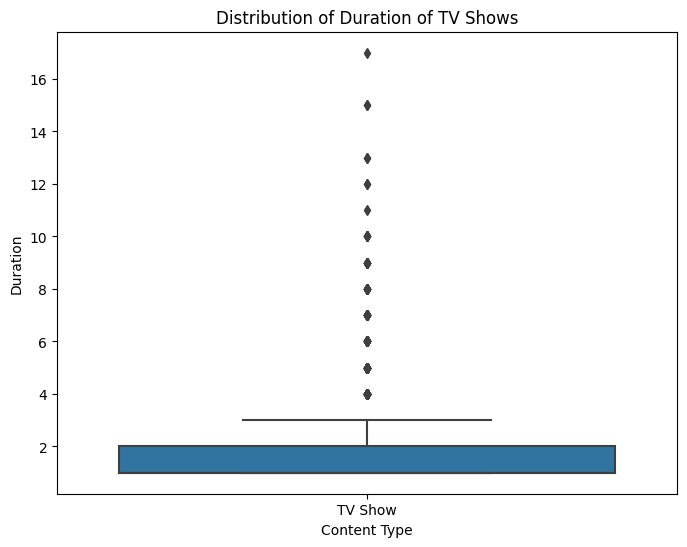

In [ ]:
# # Duration of TV Shows on Netflix

fig = plt.figure(figsize=(8,6))
# ax=sns.boxplot(data=netflix_df[netflix_df['type']=='TV Show'],x='type',y='duration_n')
ax = sns.boxplot(data=netflix_df_filtered[netflix_df_filtered['type'] == 'TV Show'], x='type', y='duration_n')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration of TV Shows')
plt.show()

Insight : Most of the TV shows have 1 to 4 seasons except few which have longer duration
From above two box plots it's evident that Netflix prefers shorter formats, be it Movies or TV Shows

# **Recomendations:**

1 Netflix has to focus on TV Shows also because there are people who will like to see tv shows rather than movies.

2 By approaching the top director we can plan some more movies/tv shows in order to add new movies/show on platform which will increase business.

3 The average movie adding time after release should be decreased as much as possible.

4 Mainly the release in ott should focus on the festival holidays, year end and weekends which is to be mainly focused.

5 Should release movies/shows of top rated actors who has immense following.

6 Some movies can be released directly into platform which has some positive talk which may help in improving subscriptions.

7 Focus on addding movies/shows for different countries to grab users from worldwide.



#### Conclusion

July and December are two months when Netflix adds more content to get advantage of holidays

Netflix has added more Movies than TV Shows in over the years

Netflix viewers are showing more preference in Interntional Movies, Dramas & comedies.

Most of the Subscribers prefer short duration TV shows (usually 1 to 4 seasons)
and Movies of around 2 hrs with few exceptional movies of little longer duration.